In [72]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

In [73]:
dataset = pd.read_pickle('final_filled_n_10_dataset.pkl')

# fill with zeros
dataset['percent_of_oct_deaths_in_oct_and_sept'] = dataset['percent_of_oct_deaths_in_oct_and_sept'].fillna(0)
dataset['percent_of_oct_cases_in_oct_and_sept'] = dataset['percent_of_oct_cases_in_oct_and_sept'].fillna(0)
#######

# remove nans
# dataset = dataset.dropna()
# dataset = dataset.reset_index()
######

dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 212 entries, 0 to 211
Data columns (total 14 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   countryterritoryCode                   212 non-null    object 
 1   countriesAndTerritories                212 non-null    object 
 2   percent_of_oct_cases_in_oct_and_sept   212 non-null    float64
 3   percent_of_oct_deaths_in_oct_and_sept  212 non-null    float64
 4   cases_since_sept_per100k               212 non-null    float64
 5   deaths_since_sept_per100k              212 non-null    float64
 6   avg_temp                               212 non-null    float64
 7   gdp_per_capita                         212 non-null    float64
 8   pop_density                            212 non-null    float64
 9   med_beds                               212 non-null    float64
 10  physicians                             212 non-null    float64
 11  pop_ab

In [74]:
labelless_dataset = dataset.drop(columns=['countryterritoryCode', 'countriesAndTerritories'])
global_means = labelless_dataset.mean()

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model = model.fit(labelless_dataset)

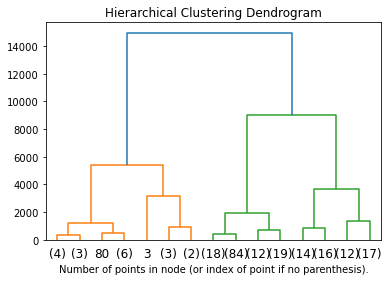

In [75]:
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()
# 4 klastry

In [76]:
cases_and_deaths = labelless_dataset[['cases_since_sept_per100k', 'deaths_since_sept_per100k', 'percent_of_oct_cases_in_oct_and_sept', 'percent_of_oct_cases_in_oct_and_sept']].copy()

model1 = AgglomerativeClustering(distance_threshold=0, n_clusters=None)
model1 = model1.fit(cases_and_deaths)

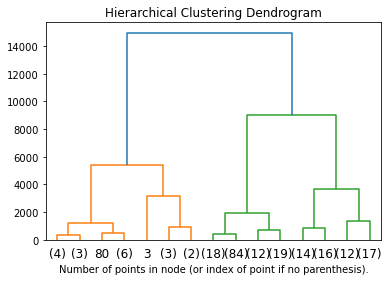

In [77]:
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model1, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()
# 4 klastry

In [78]:
# pełen set
model = AgglomerativeClustering(n_clusters=3)
model = model.fit(labelless_dataset)
labelless_dataset['cluster'] = model.labels_

In [79]:
full_set_means = labelless_dataset.groupby('cluster').mean()

In [80]:
model = AgglomerativeClustering(n_clusters=3)
model = model.fit(cases_and_deaths)
cases_and_deaths['cluster'] = model.labels_

In [81]:
cases_and_deaths_means = cases_and_deaths.groupby('cluster').mean()

In [82]:
# różnice do globalnych wartości
full_set_means.sub(global_means).abs()

,percent_of_oct_cases_in_oct_and_sept,percent_of_oct_deaths_in_oct_and_sept,cases_since_sept_per100k,deaths_since_sept_per100k,avg_temp,gdp_per_capita,pop_density,med_beds,physicians,pop_above_65,traffic_mortality,PM25
cluster,,,,,,,,,,,,
0,0.118002,0.311236,2252.227897,19.359453,0.632935,0.889171,0.054779,0.412451,0.855529,0.864366,0.718917,0.415384
1,0.081886,0.162175,455.185084,5.765965,0.271557,0.236608,0.189389,0.223336,0.534270,0.459389,0.415768,0.137845
2,0.054070,0.118745,540.605097,5.469030,0.215643,0.238671,0.075777,0.161097,0.365658,0.333769,0.292546,0.123613


In [94]:
cases_and_deaths_means.sub(global_means[['cases_since_sept_per100k', 'deaths_since_sept_per100k', 'percent_of_oct_cases_in_oct_and_sept', 'percent_of_oct_cases_in_oct_and_sept']]).abs()

,cases_since_sept_per100k,deaths_since_sept_per100k,percent_of_oct_cases_in_oct_and_sept,percent_of_oct_cases_in_oct_and_sept
cluster,,,,
0,2252.227897,19.359453,0.118002,0.118002
1,455.185084,5.765965,0.081886,0.081886
2,540.605097,5.469030,0.054070,0.054070


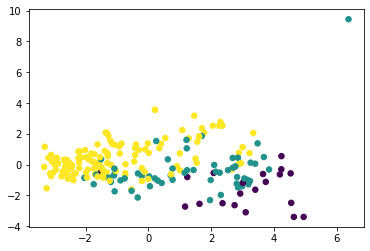

In [97]:
# agglo rysunki
from sklearn.preprocessing import StandardScaler

import sklearn.decomposition
normalized_labelless_dataset = labelless_dataset.drop(columns=['cluster']).copy()
normalized_labelless_dataset[:] = StandardScaler().fit_transform(normalized_labelless_dataset)

# from sklearn.cluster import KMeans
# agglo = AgglomerativeClustering(n_clusters=3)
y_agglo_full_set = labelless_dataset['cluster']

pca = sklearn.decomposition.PCA(n_components = 2)
coords = pca.fit_transform(normalized_labelless_dataset)

plt.scatter(coords[:, 0], coords[:, 1], c=y_agglo_full_set, s=30, cmap='viridis')
plt.show()

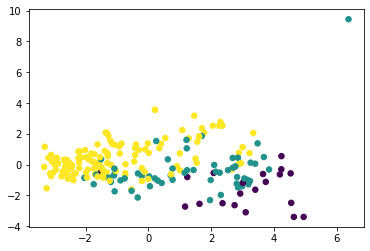

In [98]:
normalized_cases_and_deaths = cases_and_deaths.drop(columns=['cluster']).copy()
normalized_cases_and_deaths[:] = StandardScaler().fit_transform(normalized_cases_and_deaths)

# from sklearn.cluster import KMeans
# agglo = AgglomerativeClustering(n_clusters=3)
y_agglo_cases_and_deaths = cases_and_deaths['cluster']

pca = sklearn.decomposition.PCA(n_components = 2)
coords = pca.fit_transform(normalized_labelless_dataset)

plt.scatter(coords[:, 0], coords[:, 1], c=y_agglo_cases_and_deaths, s=30, cmap='viridis')
plt.show()

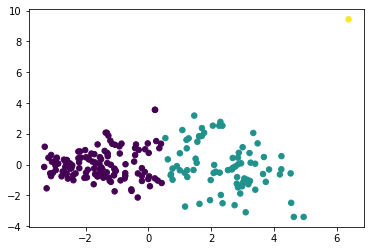

In [99]:
# kmeans rysunki

normalized_labelless_dataset = labelless_dataset.drop(columns=['cluster']).copy()
normalized_labelless_dataset[:] = StandardScaler().fit_transform(normalized_labelless_dataset)

from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(normalized_labelless_dataset)
y_kmeans_full_set = kmeans.predict(normalized_labelless_dataset)

pca = sklearn.decomposition.PCA(n_components = 2)
coords = pca.fit_transform(normalized_labelless_dataset)

plt.scatter(coords[:, 0], coords[:, 1], c=y_kmeans_full_set, s=30, cmap='viridis')
plt.show()

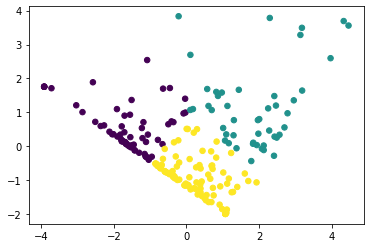

In [100]:
normalized_cases_and_deaths = cases_and_deaths.drop(columns=['cluster']).copy()
normalized_cases_and_deaths[:] = StandardScaler().fit_transform(normalized_cases_and_deaths)

kmeans = KMeans(n_clusters=3)
kmeans.fit(normalized_cases_and_deaths)
y_kmeans_cases_and_deaths = kmeans.predict(normalized_cases_and_deaths)

pca = sklearn.decomposition.PCA(n_components = 2)
coords = pca.fit_transform(normalized_cases_and_deaths)

plt.scatter(coords[:, 0], coords[:, 1], c=y_kmeans_cases_and_deaths, s=30, cmap='viridis')
plt.show()

In [102]:
from sklearn.metrics import calinski_harabasz_score
ks = range(2, 21)
print("full set, kmeans")
for k in ks:
    scores = []
    for _ in range(20):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(normalized_labelless_dataset)
        y_kmeans = kmeans.predict(normalized_labelless_dataset)

        scores.append(calinski_harabasz_score(normalized_labelless_dataset, y_kmeans))

    print("k=%d score=%lf"%(k, np.mean(np.array(scores))))

k=2 score=99.898850
k=3 score=70.190623
k=4 score=62.146711
k=5 score=57.237147
k=6 score=52.993096
k=7 score=50.346274
k=8 score=48.435915
k=9 score=46.572426
k=10 score=45.291611
k=11 score=44.316201
k=12 score=43.342581
k=13 score=41.899522
k=14 score=41.016769
k=15 score=40.136585
k=16 score=38.870889
k=17 score=38.326612
k=18 score=37.120880
k=19 score=36.288602
k=20 score=35.553069


In [103]:
print("cases and deaths, kmeans")
for k in ks:
    scores = []
    for _ in range(20):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(normalized_cases_and_deaths)
        y_kmeans = kmeans.predict(normalized_cases_and_deaths)

        scores.append(calinski_harabasz_score(normalized_cases_and_deaths, y_kmeans))

    print("k=%d score=%lf"%(k, np.mean(np.array(scores))))

cases and deaths, kmeans
k=2 score=125.283820
k=3 score=159.192310
k=4 score=144.100005
k=5 score=146.719970
k=6 score=159.983554
k=7 score=170.561126
k=8 score=164.664307
k=9 score=161.180116
k=10 score=159.954861
k=11 score=159.485377
k=12 score=158.662953
k=13 score=157.974353
k=14 score=158.224760
k=15 score=158.403409
k=16 score=159.083097
k=17 score=160.995608
k=18 score=162.126439
k=19 score=164.077861
k=20 score=166.058617


In [104]:
print("full set, agglo")
for k in ks:
    scores = []
    for _ in range(20):
        agglo = AgglomerativeClustering(n_clusters=k)
        agglo = agglo.fit(normalized_labelless_dataset)
        y_kmeans = agglo.labels_

        scores.append(calinski_harabasz_score(normalized_labelless_dataset, y_kmeans))

    print("k=%d score=%lf"%(k, np.mean(np.array(scores))))

full set, agglo
k=2 score=87.195323
k=3 score=62.795132
k=4 score=55.357052
k=5 score=50.882035
k=6 score=47.583291
k=7 score=45.181550
k=8 score=44.020703
k=9 score=43.523551
k=10 score=43.381243
k=11 score=42.507329
k=12 score=41.913080
k=13 score=41.119506
k=14 score=40.090181
k=15 score=39.191046
k=16 score=38.420680
k=17 score=37.492200
k=18 score=36.746246
k=19 score=36.157444
k=20 score=35.634308
